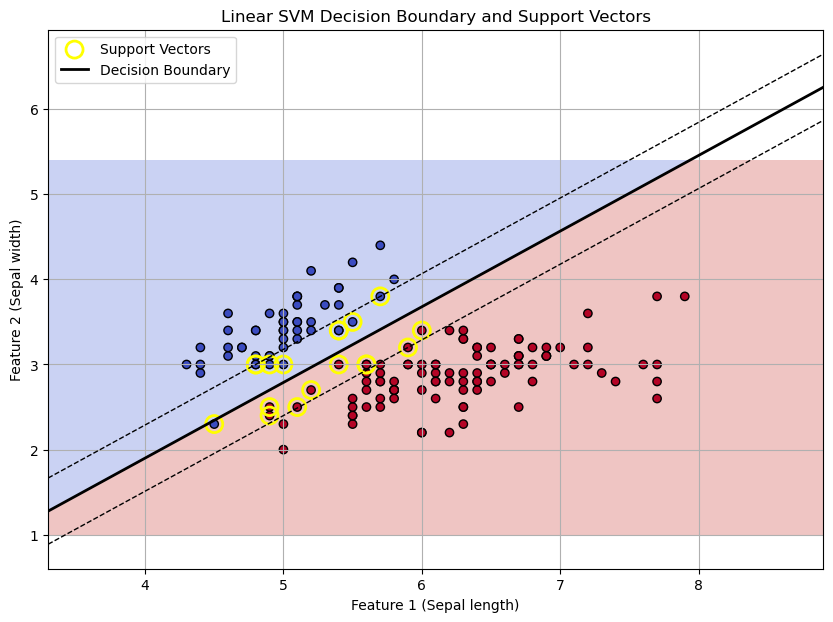

w: [ 2.28565137 -2.57106925]
b: -4.257975598320261


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# 1. 데이터 준비 (Iris)
iris = datasets.load_iris()
X = iris.data[:, :2]  # 2개의 특성만 사용 (시각화 용이)
y = iris.target

# Binary classification: Setosa(0) vs Others(1)
y = (y != 0).astype(int)

# 2. Linear SVM 모델 생성 & 학습
clf = SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# 3. 그래프용 그리드 생성
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

# 4. 모델 예측 (결정경계용)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5. 그래프 그리기
plt.figure(figsize=(10, 7))

# 배경 클래스 영역
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# 데이터 포인트
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

# 서포트 벡터 표시
plt.scatter(clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150, facecolors='none', edgecolors='yellow',
            linewidths=2, label="Support Vectors")

# 결정경계(초평면) 직접 계산
w = clf.coef_[0]
b = clf.intercept_[0]

# x축 값
x_vals = np.linspace(x_min, x_max, 100)

# 결정경계: w1*x1 + w2*x2 + b = 0  → x2 = -(w1/w2)x1 - b/w2
y_vals = -(w[0] / w[1]) * x_vals - b / w[1]

# 마진 ±1: w1*x1 + w2*x2 + b = ±1  → x2 = ...
margin_up = -(w[0] / w[1]) * x_vals - (b - 1) / w[1]
margin_down = -(w[0] / w[1]) * x_vals - (b + 1) / w[1]

# 결정 경계 및 마진 선을 그림
plt.plot(x_vals, y_vals, 'k-', linewidth=2, label="Decision Boundary")
plt.plot(x_vals, margin_up, 'k--', linewidth=1)
plt.plot(x_vals, margin_down, 'k--', linewidth=1)

plt.xlabel("Feature 1 (Sepal length)")
plt.ylabel("Feature 2 (Sepal width)")
plt.title("Linear SVM Decision Boundary and Support Vectors")
plt.legend()
plt.grid(True)
plt.show()

print("w:", w)
print("b:", b)


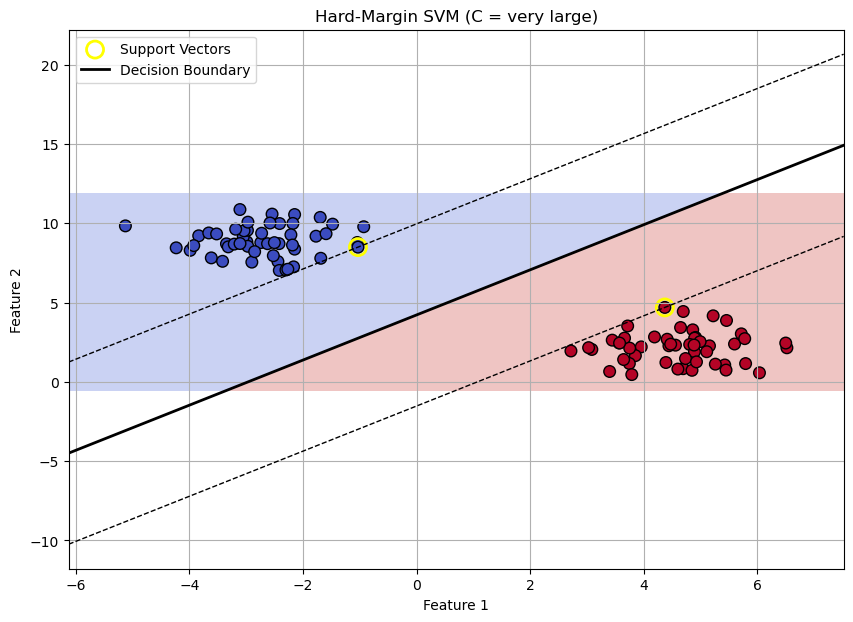

Weight vector w: [ 0.24748994 -0.17407192]
Bias b: 0.7341550476191021
Support Vectors:
 [[-1.03130358  8.49601591]
 [ 4.375222    4.69333885]]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# 1. 선형 분리 가능한 데이터 생성
X, y = make_blobs(n_samples=100, centers=2,
                  n_features=2, random_state=42, cluster_std=1.0)

# 2. Hard-Margin SVM: C 값을 매우 크게 설정
clf = SVC(kernel='linear', C=1e10)  # 사실상 Hard Margin
clf.fit(X, y)

# 3. 그래프용 그리드 생성
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 4. 그래프 그리기
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# 데이터 점
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm,
            edgecolors='k', s=70)

# Support vectors
plt.scatter(clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150, facecolors='none', edgecolors='yellow',
            linewidths=2, label="Support Vectors")

# 결정경계 그리기
w = clf.coef_[0]
b = clf.intercept_[0]

x_vals = np.linspace(x_min, x_max, 100)
y_vals = -(w[0] * x_vals + b) / w[1]

# hard-margin boundary (±1 margin)
margin_up = -(w[0] * x_vals + b - 1) / w[1]
margin_down = -(w[0] * x_vals + b + 1) / w[1]

plt.plot(x_vals, y_vals, 'k-', linewidth=2, label="Decision Boundary")
plt.plot(x_vals, margin_up, 'k--', linewidth=1)
plt.plot(x_vals, margin_down, 'k--', linewidth=1)

plt.title("Hard-Margin SVM (C = very large)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

print("Weight vector w:", w)
print("Bias b:", b)
print("Support Vectors:\n", clf.support_vectors_)
